In [2]:
import networkx as nx
import pylab as plt
import pandas as pd
import numpy as np
# Create blank graph
D=nx.DiGraph()

citations_with_data= pd.read_csv('citations(hep-th)_with_Data.csv')

C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [122]:
Authors_seed = pd.read_csv('./authors_seed.csv')
Authors_seed

,Authors,Seed
0,A Shirzad and F Loran,7c7137cb1b7fb32a9ead37fdc3962e908af9066085e18d...
1,A. A. Abrikosov Jr,7c037faf08e96a7155bff4fcca5a3580990376669a4625...
2,"A. A. Andrianov, R. Soldati, L. Sorbo",9844350bf2c78c15f131563eef2bbc8a77e315e42344ec...
3,"A. A. Tseytlin, K. Zarembo",e18d25d3766f2232eb66d7b578f578b03e9d8ff25803a4...
4,"A. B. Bylev, H. J. Pirner",c811fa24c0ea190dc038f61045fcac3153fc8a1cf242f4...
...,...,...
1328,"Zahid Zakir (Institute of Noosphere,Tashkent, ...",1e0edc84b3ebfcad1664c570913ab3a3ba9e9711e98d30...
1329,Zurab Kakushadze and S.-H. Henry Tye,2aa64f1b2947141ed4b8d6af244acd8eb0f977a4003662...
1330,"Zygmunt Lalak (ITP Warsaw), Andre' Lukas (UPen...",3936c3d8a3f61e30447a9a978f140b1e20dd9e8ed857b4...
1331,Zygmunt Lalak and Steven Thomas,4b3b7ab38145321ccd63fab25f95f674b0fac19ca0b62e...


In [13]:
uniqueNodes = np.concatenate([np.unique(citations_with_data.FromNodeId.values),np.unique(citations_with_data.ToNodeId.values)])
uniqueNodes = np.unique(uniqueNodes)


D=nx.DiGraph()

for i in uniqueNodes:
    D.add_node(str(i),nodeId = str(i))
    
for i in range(len(citations_with_data)):  
    D.add_weighted_edges_from([(str(citations_with_data.iloc[i]['FromNodeId']),str(citations_with_data.iloc[i]['ToNodeId']),1)])
    
# Plot graph
#nx.draw(D, with_labels=False)
#plt.show()
D.nodes


NodeView(('9310202', '9312202', '9312206', '9312207', '9312208', '9312209', '9312210', '9406203', '9406206', '9406207', '9406208', '9406209', '9406210', '9406213', '9406214', '9406216', '9406217', '9410203', '9410205', '9410206', '9410209', '9410212', '9410215', '9410219', '9410223', '9410230', '9410235', '9410237', '9410238', '9410241', '9411203', '9411210', '9411214', '9411218', '9411223', '9411224', '9411230', '9411231', '9411232', '9411234', '9411235', '9412203', '9412204', '9412205', '9412207', '9412209', '9412210', '9412213', '9412218', '9412224', '9412228', '9412229', '9412235', '9412236', '9412237', '9412239', '9412242', '9503201', '9503202', '9503203', '9503204', '9503205', '9503207', '9503208', '9503209', '9503211', '9503212', '9503214', '9503217', '9503220', '9503222', '9503224', '9503225', '9503226', '9503227', '9503228', '9503229', '9503232', '9503236', '9503237', '9506207', '9506213', '9506215', '9510201', '9510204', '9510206', '9510207', '9510208', '9510209', '9510210', 

In [152]:
D_df = nx.to_pandas_edgelist(D)
D_df

,source,target,weight
0,9312207,9312202,1
1,9410209,9312209,1
2,9410237,9406206,1
3,9411232,9406207,1
4,9412209,9410212,1
...,...,...,...
1972,9912292,9702202,1
1973,9912292,9711203,1
1974,9912292,9811232,1
1975,9912292,9811244,1


In [15]:
#FROM GRAPH TO ADJ MAT

AM =nx.adjacency_matrix(D, nodelist=D.nodes()).todense() #list storage type
#AM = nx.attr_matrix(D,nodelist=D.nodes(),node_attr='nodeId')
print(AM)
#AM_matrix = AM_sparse.todense()
AM_matrix_df = pd.DataFrame(AM)
AM_matrix_df

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
AM_matrix_df.set_index(uniqueNodes,inplace = True)
AM_matrix_df.columns = uniqueNodes
AM_matrix_df

,9310202,9312202,9312206,9312207,9312208,9312209,9312210,9406203,9406206,9406207,...,9912275,9912278,9912279,9912280,9912284,9912285,9912287,9912290,9912292,9912293
9310202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9312202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9312206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9312207,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9312208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
DF = pd.read_csv('./AM_Matrix.csv')
DF.rename(columns={'Unnamed: 0':'NO'}, inplace = True)
DF.set_index('NO',inplace = True,drop=True)

DF

,00168ef7c9a4fed70901c32e2a3311a60893e328859fcd615100cf40da97344e,00a5614eecf54e2d713de00b7a6a75814ca14d5732779117f77346fa01ddca12,00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b11d6dd409616db1a2,00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811c40f97a0ab61ae5a0,010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653f755ec24802635e3a,012339d7d671c04790fe138a9a3b12cf8b086871a5d3f30a3e7bc8397dc90f12,018ebf6145dd4fd0a4d65369c1eb0a2c349c0c46036f46d5791fce5d7c49d08a,01ae695ad5641c0f2b920d0066852d6fe8064acd3fe7590f6230bafcd6ff534a,023e3d30c4715150b21baa4a976d36f4647f21d15f17b9703231c7d51dafedb0,02b06f1e5caa2d6b8489ffa40bb321c7b62cdf2bce0d6ef61cc38bffa2a4f8cc,...,fdd022bf453a8d620dbf0c05b7a01c1233ec15454484aa3c2dce65e13489ef9d,fde67c167fea57ba49205b24abc47bafc96f76d318e19e9183314120307dc4b6,fde7b9779edadb0549355d89d9ec330250f09f965b059ef1317659c1255ae3d8,fdfa6a73ea5fbfcbd5c7650951ec26f5fbea28d8d4b275b929673a360947b7d7,fe134f3e076ab28cdb553a309ef1940a3e3c5d454ec26b28793d1e9eb042dad5,fe8853528bdee7911b91829edffd3479ee6376168c8790665ec59f1ecde8b05c,feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0d20dd37f5b97d848b1,ff24acad38556b1c8d521f449c0399008632be8d96b0c25a3da0766658502646,ff665fdeae13e20a855549e1e389b3992088650b2feea22b4dbfbe0c051d5ccc,ff9af28010b1a78e3af698c64734cecf907988b927435d9a887a4cdcce248611
NO,,,,,,,,,,,,,,,,,,,,,
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd615100cf40da97344e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00a5614eecf54e2d713de00b7a6a75814ca14d5732779117f77346fa01ddca12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b11d6dd409616db1a2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811c40f97a0ab61ae5a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653f755ec24802635e3a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe8853528bdee7911b91829edffd3479ee6376168c8790665ec59f1ecde8b05c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0d20dd37f5b97d848b1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ff24acad38556b1c8d521f449c0399008632be8d96b0c25a3da0766658502646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
q = pd.DataFrame(DF.loc['ff9af28010b1a78e3af698c64734cecf907988b927435d9a887a4cdcce248611'])
q[q['ff9af28010b1a78e3af698c64734cecf907988b927435d9a887a4cdcce248611']!=0]

,ff9af28010b1a78e3af698c64734cecf907988b927435d9a887a4cdcce248611
639f14c72f820958ec46d4421532e2e691aff9854ec6b5116ad994001f4fb2d2,1
a3a3de2d5f918c45f4aa596c92077c6dbc3dd1d78b3c086cf9a6f6bb64c72b2c,1
b0f7ce457dedd8058ef12e0e4eb62b793b086dded943b76bde994d32ec2ac312,1
d5143ff1c465bd04cdc7a8f2c30d9ed7a1528b167b417c22c7d20121ebd80ed2,1
e8e21119f3fec2cc5279e44167d21be3f9d85ba149ea9638afe2e6f2b039fc3d,1


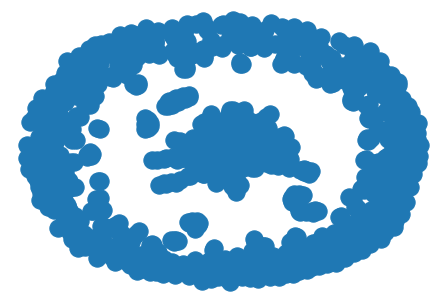

In [40]:
#FROM ADJ MAT TO GRAPH
D_2 = nx.from_numpy_matrix(AM_matrix, create_using = nx.MultiGraph())
nx.draw(D_2, with_labels=False)
plt.show()

In [16]:
import numpy as np
np.shape(AM_matrix) #ho 1066 nodi

(1066, 1066)

In [59]:
# Print page rank for each pages
PR = nx.pagerank(D)

PR_df = pd.DataFrame.from_dict(PR,orient='index')

PR_df

,0
9503222,0.000211
9310202,0.000391
9312207,0.000480
9312202,0.000619
9910201,0.000271
...,...
9911207,0.000271
9911254,0.000211
9911219,0.000391
9912235,0.000211


In [60]:
PR_df[0].sum() #ho la prob di ogni nodo

0.9999999999999998

In [61]:
PR_df[0].max()

0.017438148870543617

In [3]:
PR_df = pd.read_csv('./PR_df.csv')
PR_df.sort_values(by='0',inplace = True, ascending=False)
PR_df.reset_index(drop = True, inplace = True)

<AxesSubplot:>

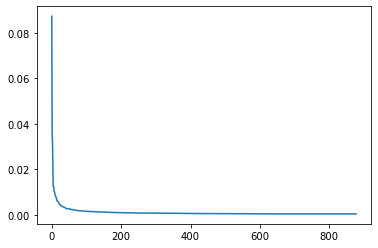

In [4]:
PR_df['0'].plot()

In [5]:
PR_df

,Unnamed: 0,0
0,6931225d86818ee20b88f9c580fb0e8f918ba1f09b916b...,0.087266
1,7c7699a363945e1b8c78c1cb3033b2871ff3dd535455d5...,0.035087
2,9317c6bae55975e6c0e43715c913510bd10d13fd7cf767...,0.032085
3,53a49de7833c00df72e5cd19d3e60b94658a426a9fe1a8...,0.023860
4,ba0b01a499f90eb8110ed4d3cd35df37fbe631438ef175...,0.012398
...,...,...
873,74407d3b3342ec6708a916341a2fafafc20a3173cf9219...,0.000402
874,7410c78ba8f847e2a020b477da9b73395f23c87998fbec...,0.000402
875,72475d394dfb19377e5caed2fc7d74ebae72d075cfb643...,0.000402
876,70d5d76ddcf920b5874e9b607bda95c0b8acb9753c5e40...,0.000402


In [6]:
PR_df['0'].max()

0.0872661591574683

In [7]:
PR_df['0'].sum()

0.9999999999999557

(array([868.,   6.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00040237, 0.00908874, 0.01777512, 0.0264615 , 0.03514788,
        0.04383426, 0.05252064, 0.06120702, 0.0698934 , 0.07857978,
        0.08726616]),
 <BarContainer object of 10 artists>)

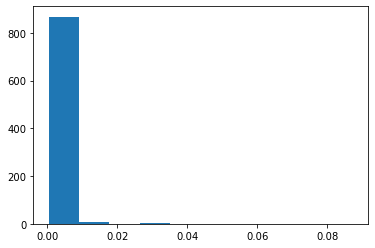

In [130]:
plt.hist(PR_df['0'])

In [117]:
AM_matrix = np.loadtxt('./AM_Matrix.txt')
AM_matrix_df = pd.DataFrame(AM_matrix)
AM_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,867,868,869,870,871,872,873,874,875,876
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
print(bytes.fromhex('68656c6c6f').decode('utf-8'))

9f0c14d4de7aa9ab084b0b929804e0ac51a28928fedc752d273974ffe4b6ab28
